# Facets

In [3]:
import pandas as pd
import altair as alt

In [4]:
churn = pd.read_csv("data/churn.csv")

In [5]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [6]:
churn.dtypes

CustomerID           object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Facets Example

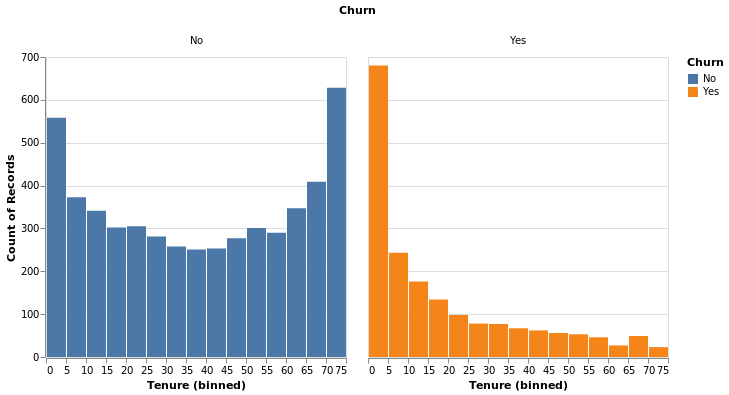

In [7]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()"),
    alt.Column("Churn"),
    alt.Color("Churn")
).properties(width=300,height=300)

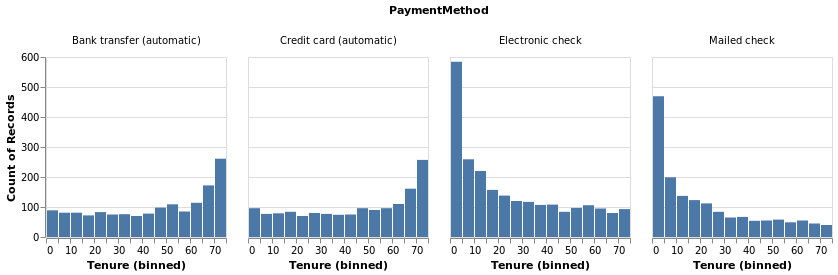

In [8]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()"),
    alt.Column("PaymentMethod")
).properties(width=180,height=180)

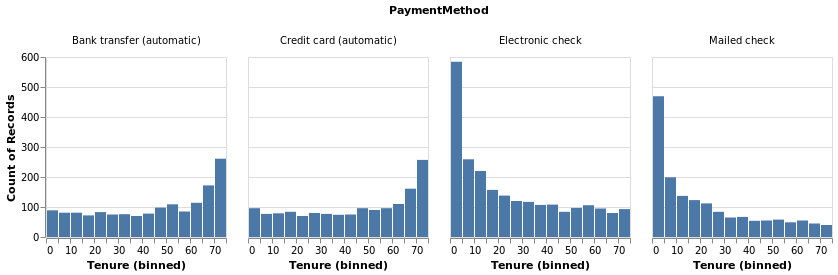

In [9]:
alt.Chart(churn).mark_bar().encode(
    alt.X("Tenure:Q", bin=alt.BinParams(maxbins=20)),
    alt.Y("count()")
).properties(width=180,height=180).facet(
    column="PaymentMethod"
)

### Repeat


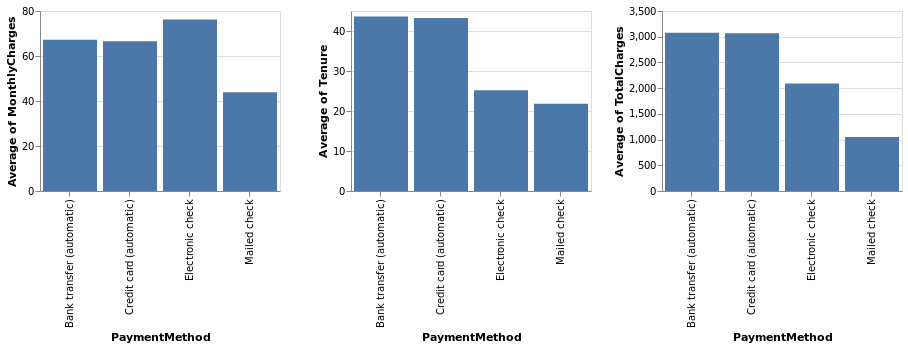

In [12]:
alt.Chart(churn).mark_bar().encode(
  alt.X('PaymentMethod'),
  alt.Y(alt.repeat('column'), aggregate='average', type='quantitative'),
).properties(
  width=240,
  height=180
).repeat(
  column=['MonthlyCharges', 'Tenure', 'TotalCharges']
)

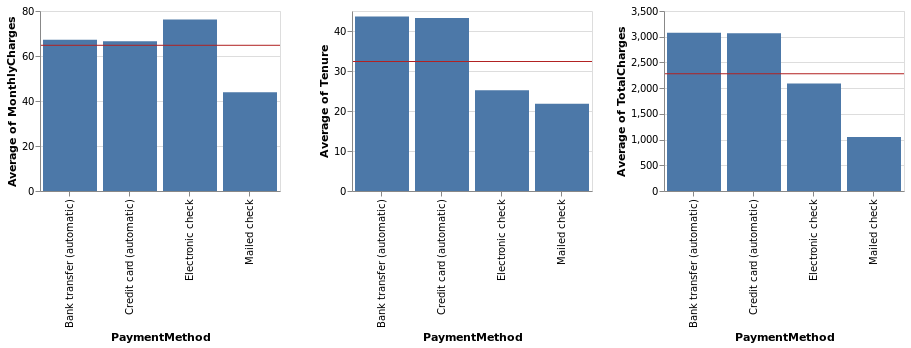

In [53]:
alt.layer(
    alt.Chart(churn).mark_bar().encode(
      alt.X('PaymentMethod'),
      alt.Y(alt.repeat('column'), aggregate='average', type='quantitative'),
    ),
    alt.Chart(churn).mark_rule(color="firebrick").encode(
        alt.Y(alt.repeat('column'), aggregate='average', type="quantitative")
    )
).properties(
  width=240,
  height=180
).repeat(
  column=['MonthlyCharges', 'Tenure', 'TotalCharges']
)